In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import warnings
warnings.filterwarnings('ignore')
import os
import re

In [363]:
# Latest 2017 directory
path = '/Users/ralphonseraj/Desktop/M.Tech-DSML-PES-Univ/Capstone Project/Historic_Election_Results/UP_Election/Analysis_UP_Election/2017'

res_2017 = pd.DataFrame(columns=['Year', 'diffs','label','index','AC_Name','Position','Name','Votes', 'Votes %', 'Party', '2_Name', '2_Votes', '2_Votes %', '2_party'])

for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith(("xlsx")):
            f = root + '/' + name
            df = pd.read_excel(f, sheet_name = 0, skiprows = 0)
            df['Year'] = name.split('_')[0]
            res_2017 = res_2017.append(df)
            
res_2017 = res_2017.reset_index()


In [364]:
AC_2017 = list(res_2017.AC_Name.unique())
res_2017.Year.value_counts()

2017    398
Name: Year, dtype: int64

In [365]:
# assign directory
path = '/Users/ralphonseraj/Desktop/M.Tech-DSML-PES-Univ/Capstone Project/Historic_Election_Results/UP_Election/Analysis_UP_Election'

res = pd.DataFrame(columns=['Year', 'diffs','label','index','AC_Name','Position','Name','Votes', 'Votes %', 'Party', '2_Name', '2_Votes', '2_Votes %', '2_party'])

for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith(("xlsx")):
            f = root + '/' + name
            df = pd.read_excel(f, sheet_name = 0, skiprows = 0)
            df['Year'] = name.split('_')[0]
            res = res.append(df)
            
res = res.reset_index()

            

In [366]:
res = res[res['AC_Name'].isin(AC_2017)]

In [367]:
df = res.copy()

In [368]:
df = df.drop(['level_0', 'Unnamed: 0'],axis=1)
df.head()

Year  diffs          label index     AC_Name Position                 Name  \
0  2012   6415  Battle-Ground     6  Agra Cantt        1  Gutiyari Lal Duwesh   
1  2012  23356      Favorable     6  Agra North        1    Jagan Prasad Garg   
2  2012  18754      Favorable     5  Agra Rural        1    Kali Charan Suman   
3  2012  22960      Favorable    13  Agra South        1   Yogendra Upadhyaya   
4  2012   2083  Battle-Ground    19     Ajagara        1        Tribhuvan Ram   

   Votes Votes %                  Party  ... 2_Votes %                2_party  \
0  67786   32.5%    Bahujan Samaj Party  ...     29.4%  Bharatiya Janta Party   
1  68401   34.8%  Bharatiya Janta Party  ...     22.9%    Bahujan Samaj Party   
2  69969   34.8%    Bahujan Samaj Party  ...     25.5%        Samajwadi Party   
3  74324   37.8%  Bharatiya Janta Party  ...     26.1%    Bahujan Samaj Party   
4  60239   32.3%    Bahujan Samaj Party  ...     31.2%        Samajwadi Party   

  2_Name_x 2_Votes_x 2_Votes %_x  2_party_x 2_Name_y 2_Votes_y 2_Votes %_y  \
0      NaN       NaN         NaN        NaN      NaN       NaN         NaN   
1      NaN       NaN         NaN        NaN      NaN       NaN         NaN   
2      NaN       NaN         NaN        NaN      NaN       NaN         NaN   
3      NaN       NaN         NaN        NaN      NaN       NaN         NaN   
4      NaN       NaN         NaN        NaN      NaN       NaN         NaN   

   2_party_y  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  

[5 rows x 22 columns]

In [369]:
df.Year.value_counts()

2017    398
2012    393
1996    232
1993    230
2007    230
2002    230
Name: Year, dtype: int64

In [370]:
party = {'Independent' : 'I',
                           'Rashtriya Swabhimaan Party' : 'RSP',
                           'Indian Justice Party' : 'IJP',
                           'Rashtriya Lok Dal' : 'RLD',
                           'Jan Morcha' : 'JM',
                           'Bharatiya Janta Party' : 'BJP',
                           'Lok Dal' : 'LD',
                           'Lok Jan Shakti Party': 'LJSP',
                           'Samajwadi Party' : 'SP',
                           'Shiv Sena' : 'SS',
                           'Indian National Congress' : 'INC',
                           'Bharatiya Jan Shakti' : 'BJS',
                           'Rashtriya Janata Dal' : 'RJD',
                           'Ambedkar Samaj Party' : 'ASP',
                           'National Lokhind Party' : 'NLP',
                           'Suheldev Bhartiya Samaj Party' : 'SBSP',
                           'Bahujan Samaj Party' : 'BSP',
                           'Uttar Pradesh United Democratic Front' : 'UPUDF',
                           'Nationalist Congress Party' : 'NCP',
                           'Bharatiya Republican Paksha' : 'BRP',
                           'Communist Party Of India (MARXIST-LENINIST) (LIBERATION)' : 'CPOIMLL',
                           'Rashtriya Kranti Party' : 'RKP',
                           'Navbharat Nirman Party' : 'NNP',
                            'Bharatiya Sarvodaya Kranti Party' : 'BSKP',
                             'Janata Dal (Secular)': 'JDS',
                             'Rashtriya Samanta Dal' : 'RSD',
                             'Republican Party Of India' : 'RPOI',
                             'Republican Party Of India (A)': 'RPOIA',
                             'Bahujan Kisan Dal':'BKD',
                             'Samata Party' : 'SP',
                             'Janvadi Party (Socialist)' : 'JPS',
                             'Akhil Bharat Hindu Mahasabha' : 'ABHM',
                             'Rashtriya Parivartan Dal' : 'RPD',
                             'Samajwadi Janata Party (RASHTRIYA)' : 'SJPR',
                             'Pragtisheel Manav Samaj Party' : 'PMSP',
                             'Loktrantrik Janata Front': 'LJF',
                             'Rashtriya Krantikari Samajwadi Party' : 'RKSP',
                             'Revolutionary Socialist Party' : 'RSP',
                             'Bahujan Uday Manch' : 'BUM',
                             'Ittehad-E-Millait Council' : 'IEMC',
                             'Ambedkar National Congress' : 'ANC',
                             'Bharatiya Eklavya Party' : 'BEP',
                             'National Loktantrik Party' : 'NLP',
                             'Jai Jawan Jai Kisan Mazdoor Congress' : 'JJJKMC',
                             'Rashtrawadi Samaj Party' : 'RSP',
                             'Bharat Punarnirman Dal' : 'BPD',
                             'All India Minorities Front' : 'AIMF',
                             'Parcham Party Of India' : 'PPOI',
                             'Apna Dal' : 'AD',
                             'Lokpriya Samaj Party' : 'LSP',
                             'Sanyukt Samajwadi Dal' : 'SSD',
                             'Communist Party Of India' : 'CPOI',
                             'Pichhra Samaj Party': 'PSP',
                             'Gondvana Gantantra Party' : 'GGP',
                             'Bharatiya Samaj Dal' : 'BSD',
                             'Hind Kisan Mazdoor Party' : 'HKMP',
                             'Awami Party' : 'AP',
                             'Ekta Krandi Dal U.P.' : 'EKDUP',
                             'Rashtravadi Communist Party' : 'RCP',
                             'Jansatta Party' : 'JP',
                             'Lok Paritran' : 'LP',
                             'Bharatiya Vikash Party' : 'BVP',
                             'Rashtriya Mazdoor Ekta Party' : 'RMEP',
                             'Moderate Party' : 'MP',
                             'Muslim League Kerala State Committee' : 'MLKSC',
                             'Bahujan Shakty' : 'BS',
                             'Momin Conference' : 'MC',
                             'Muslim Majlis Uttar Pradesh' : 'MMUP',
                             'Communist Party Of India (MARXIST)' : 'CPOIM',
                             'Akhil Bhartiya Rajarya Sabha' : 'ABRS',
                             'Janata Dal (United)' : 'JDU',
                             'United Communist Party Of India' : 'UCPOI',
                             'Shoshit Samaj Dal (AKHIL BAHARATIYA)' : 'SSDAB',
                             'Sirpanch Samaj Party' : 'SSP',
                             'Janhit Morcha' : 'JM',
                             'Bharatiya Grameen Dal' : 'BGD',
                             'United Citizens Party' : 'UCP',
                             'Dharam Nirpeksh Dal' : 'DND',
                             'All India Forward Bloc' : 'AIFB',
                             'Bharatiya Nagrik Party' : 'BNP',
                             'Rashtriya Krantikari Dal' : 'RKD',
                             'Bharatiya Kisan Parivartan Party' : 'BKPP',
                             'All India Forward Bloc (Subhasist)' : 'AIFBS',
                             'Purvanchal Vikas Party' : 'PVP',
                             'Ambedkar Kranti Dal' : 'AKD',
                             'Bam Party' : 'BP',
                             'Kisan Vyawasayee Mazdoor Party' : 'KVMP',
                             'Kamgar Samaj Dal' : 'KSD',
                             'Bharatiya Naujawan Dal' : 'BND',
                             'Indian National League' : 'INL',
                             'Brij Kranti Dal' : 'BKD',
                             'Bharatiya Jan Berojgar Chhatra Dal' : 'BJBCD',
                             'Jawan Kisan Morcha' : 'JKM',
                             'Akhil Bhartiya Janata Sahara Party' : 'ABJSP',
                             'Janata Dal' : 'JD',
                             'Akhil Bharatiya Jan Sangh' : 'ABJS',
                             'Bharatiya Satyarth Sangathan' : 'BSS',
                             'Awami Socialist Party Of India' : 'ASPOI',
                             'Akhil Bharatiya Loktantra Party' : 'ABLP',
                             'Proutist Sarva Samaj Party' : 'PSSP',
                             'Bharat Kranti Rakshak Party' : 'BKRP',
                             "People's Democratic Forum" : 'PDF',
                             'Uttar Pradesh Republican Party' : 'UPRP',
                             'Rashtriya Janadhikar Party': 'RJP',
                             'Samajwadi Jan Parishad' : 'SJP',
                             'Vanchit Jamat Party' : 'VJP',
                             'Sarva Samaj Vikas Party' : 'SSVP',
                             'Parivartan Samaj Party' : 'PSP',
                             'Labour Party Of India (V.V. PRASAD)' : 'LPOIVVP',
                             'United Democratic Party' : 'UDP',
                             'Rashtriya Jan Samanatavadi (Ambedkar)' : 'RJSA',
                             'Bharatiya Jan Sabha' : 'BJS',
                             'Apna Dal (Soneylal)' : 'ADS',
                             'Bharatiya Kisan Kamgar Party' : 'BKKP',
                             'Shivrajya Party' : 'SP',
                             'Forward Bloc (SOCIALIST)' : 'FBS',
                             'The Humanist Party Of India' : 'THPOI',
                             'Islam Party Hind' : 'IPH',
                             'Jai Samaj Bharatiya Samaj Party' : 'JSBSP',
                             'Rashtriya Dehat Morcha Party' : 'RDMP',
                             'Manuvadi Party' : 'MP',
                             'Rashtriya Samajwadi Apna Dal' : 'RSAD',
                             'All India Indira Congress (TIWARI)' : 'AIICT',
                             'Akhil Bhartiya Lok Tantrik Congress' : 'ABLTC',
                             'Loktantrik Samajwadi Party' : 'LSP',
                             'Peace Party' : 'PP',
                             'Prajatantrik Lok Ekta Dal' : 'PLED',
                             'Social Action Party' : 'SAP',
                             'Jharkhand Party' : 'JP',
                             'Quami Ekta Dal' : 'QED',
                             'Uttar Khand Kranti Dal': 'UKKD',
                             'Nirbal Indian Shoshit Hamara Aam Dal' : 'NISHAD',
                             'Bharatiya Sarvkalyan Krantidal' : 'BSK'
                                                      }

In [371]:
df_party = pd.DataFrame(data=party, index=['Party_Code'])

df_party = (df_party.T)
df_party.index.name = 'Party_Name'

In [372]:
df.replace({'Party': party},inplace=True)
df.replace({'2_party': party},inplace=True)

In [373]:
df['Party_label'] = df['Party'] + str(' - ') + df['label'].astype(str)
df['Year_2_Party'] = df['Year'].astype(str) + str(' - ') + df['2_party'].astype(str)

In [374]:
df['label'].value_counts()

Battle-Ground    607
Safe             568
Favorable        538
Name: label, dtype: int64

In [375]:
df_1996 = df[df['Year'] == '1996'][['Year', 'AC_Name', 'label']]
df_1996.head()
df_1996.AC_Name.value_counts().loc[lambda x: x>1].index
df_1996.label.value_counts()

Safe             196
Battle-Ground     31
Favorable          5
Name: label, dtype: int64

In [376]:
df_2012 = df[df['Year'] == '2012'][['Year', 'AC_Name', 'label']]
df_2012.head()
df_2012.AC_Name.value_counts().loc[lambda x: x>1].index
df_2012.label.value_counts()

Battle-Ground    203
Favorable        122
Safe              68
Name: label, dtype: int64

In [377]:
df_2002 = df[df['Year'] == '2002'][['Year', 'AC_Name', 'label']]
df_2002.head()
df_2002.AC_Name.value_counts().loc[lambda x: x>1].index
df_2002.label.value_counts()

Battle-Ground    112
Favorable         70
Safe              48
Name: label, dtype: int64

In [378]:
df_1993 = df[df['Year'] == '1993'][['Year', 'AC_Name', 'label']]
df_1993.head()
df_1993.AC_Name.value_counts().loc[lambda x: x>1].index
df_1993.label.value_counts()

Battle-Ground    97
Favorable        81
Safe             52
Name: label, dtype: int64

In [379]:
df_2017 = df[df['Year'] == '2017'][['Year', 'AC_Name', 'label']]
df_2017.head()
df_2017.AC_Name.value_counts().loc[lambda x: x>1].index
df_2017.label.value_counts()

Safe             162
Favorable        161
Battle-Ground     75
Name: label, dtype: int64

In [380]:
df_2007 = df[df['Year'] == '2007'][['Year', 'AC_Name', 'label']]
df_2007.head()
df_2007.AC_Name.value_counts().loc[lambda x: x>1].index
#df_2007.label.value_counts()

Index([], dtype='object')

In [381]:
df_c = df[(df['Year'] == '1993') | (df['Year'] == '1996') | (df['Year'] == '2002') | (df['Year'] == '2012') | (df['Year'] == '2017') | (df['Year'] == '2007')][['Year', 'Year_2_Party', 'AC_Name', 'Party', 'Party_label']]
df_c.Year.value_counts()

2017    398
2012    393
1996    232
1993    230
2007    230
2002    230
Name: Year, dtype: int64

In [382]:
df_c.head()

Year Year_2_Party     AC_Name Party          Party_label
0  2012   2012 - BJP  Agra Cantt   BSP  BSP - Battle-Ground
1  2012   2012 - BSP  Agra North   BJP      BJP - Favorable
2  2012    2012 - SP  Agra Rural   BSP      BSP - Favorable
3  2012   2012 - BSP  Agra South   BJP      BJP - Favorable
4  2012    2012 - SP     Ajagara   BSP  BSP - Battle-Ground

In [383]:
df_r_party = df_c.groupby(['AC_Name','Party', 'Party_label'])['Year_2_Party'].agg(['count', ('Year_2_Party',  lambda x: ','.join(map(str, x)))]).sort_values('count', ascending=False).reset_index()

df_r_party.head()

AC_Name Party         Party_label  count  \
0         Kunda     I            I - Safe      5   
1  Jaswantnagar    SP           SP - Safe      5   
2  Lucknow West   BJP     BJP - Favorable      4   
3      Shahganj    SP  SP - Battle-Ground      4   
4  Shahjahanpur   BJP     BJP - Favorable      4   

                                        Year_2_Party  
0  2012 - BSP,1993 - SP,2007 - BSP,2017 - BJP,200...  
1  2012 - BSP,2007 - BSP,2017 - BJP,1996 - nan,20...  
2            1993 - SP,2007 - SP,2017 - SP,2002 - SP  
3       2012 - BSP,2007 - BSP,2017 - SBSP,2002 - BSP  
4           2012 - SP,1993 - SP,2007 - BSP,2017 - SP

In [384]:
df_r_party = df_r_party.sort_values('AC_Name').reset_index()[['AC_Name', 'Party', 'Party_label', 'count', 'Year_2_Party']]

df_r_party.head()


AC_Name Party          Party_label  count Year_2_Party
0  Agra Cantt   BJP           BJP - Safe      1   2017 - BSP
1  Agra Cantt   BSP  BSP - Battle-Ground      1   2012 - BJP
2  Agra North   BJP      BJP - Favorable      1   2012 - BSP
3  Agra North   BJP           BJP - Safe      1   2017 - BSP
4  Agra Rural   BJP           BJP - Safe      1   2017 - BSP

In [385]:
pd.pivot_table(df_r_party, index = 'AC_Name', columns = 'Party', aggfunc = sum)

count                                               ...      \
Party          ABLTC  AD  ADS AIICT  BJP BKKP  BSP CPOI CPOIM   I  ... QED   
AC_Name                                                            ...       
Agra Cantt       NaN NaN  NaN   NaN  1.0  NaN  1.0  NaN   NaN NaN  ... NaN   
Agra North       NaN NaN  NaN   NaN  2.0  NaN  NaN  NaN   NaN NaN  ... NaN   
Agra Rural       NaN NaN  NaN   NaN  1.0  NaN  1.0  NaN   NaN NaN  ... NaN   
Agra South       NaN NaN  NaN   NaN  2.0  NaN  NaN  NaN   NaN NaN  ... NaN   
Ajagara          NaN NaN  NaN   NaN  NaN  NaN  1.0  NaN   NaN NaN  ... NaN   
...              ...  ..  ...   ...  ...  ...  ...  ...   ...  ..  ...  ..   
Vishwanathganj   NaN NaN  1.0   NaN  NaN  NaN  NaN  NaN   NaN NaN  ... NaN   
Zafrabad         NaN NaN  NaN   NaN  1.0  NaN  NaN  NaN   NaN NaN  ... NaN   
Zahoorabad       NaN NaN  NaN   NaN  1.0  NaN  3.0  NaN   NaN NaN  ... NaN   
Zaidpur          NaN NaN  NaN   NaN  1.0  NaN  NaN  NaN   NaN NaN  ... NaN   
Zamania          NaN NaN  NaN   NaN  1.0  NaN  2.0  NaN   NaN NaN  ... NaN   

                                                         
Party          RKP RLD RPD RSP SAP SBSP SJPR   SP UPUDF  
AC_Name                                                  
Agra Cantt     NaN NaN NaN NaN NaN  NaN  NaN  NaN   NaN  
Agra North     NaN NaN NaN NaN NaN  NaN  NaN  NaN   NaN  
Agra Rural     NaN NaN NaN NaN NaN  NaN  NaN  NaN   NaN  
Agra South     NaN NaN NaN NaN NaN  NaN  NaN  NaN   NaN  
Ajagara        NaN NaN NaN NaN NaN  1.0  NaN  NaN   NaN  
...             ..  ..  ..  ..  ..  ...  ...  ...   ...  
Vishwanathganj NaN NaN NaN NaN NaN  NaN  NaN  NaN   NaN  
Zafrabad       NaN NaN NaN NaN NaN  NaN  NaN  1.0   NaN  
Zahoorabad     NaN NaN NaN NaN NaN  1.0  NaN  1.0   NaN  
Zaidpur        NaN NaN NaN NaN NaN  NaN  NaN  1.0   NaN  
Zamania        NaN NaN NaN NaN NaN  NaN  NaN  3.0   NaN  

[398 rows x 29 columns]

In [386]:
df_r_party_label = df_c.groupby(['AC_Name','Party_label']).size().reset_index(name='counts')

In [387]:
pd.pivot_table(df_r_party_label, index = 'AC_Name', columns = 'Party_label', aggfunc = sum)

counts                                     \
Party_label    ABLTC - Favorable AD - Favorable ADS - Battle-Ground   
AC_Name                                                               
Agra Cantt                   NaN            NaN                 NaN   
Agra North                   NaN            NaN                 NaN   
Agra Rural                   NaN            NaN                 NaN   
Agra South                   NaN            NaN                 NaN   
Ajagara                      NaN            NaN                 NaN   
...                          ...            ...                 ...   
Vishwanathganj               NaN            NaN                 NaN   
Zafrabad                     NaN            NaN                 NaN   
Zahoorabad                   NaN            NaN                 NaN   
Zaidpur                      NaN            NaN                 NaN   
Zamania                      NaN            NaN                 NaN   

                                                                            \
Party_label    ADS - Favorable ADS - Safe AIICT - Safe BJP - Battle-Ground   
AC_Name                                                                      
Agra Cantt                 NaN        NaN          NaN                 NaN   
Agra North                 NaN        NaN          NaN                 NaN   
Agra Rural                 NaN        NaN          NaN                 NaN   
Agra South                 NaN        NaN          NaN                 NaN   
Ajagara                    NaN        NaN          NaN                 NaN   
...                        ...        ...          ...                 ...   
Vishwanathganj             1.0        NaN          NaN                 NaN   
Zafrabad                   NaN        NaN          NaN                 NaN   
Zahoorabad                 NaN        NaN          NaN                 NaN   
Zaidpur                    NaN        NaN          NaN                 NaN   
Zamania                    NaN        NaN          NaN                 1.0   

                                                                ...  \
Party_label    BJP - Favorable BJP - Safe BKKP - Battle-Ground  ...   
AC_Name                                                         ...   
Agra Cantt                 NaN        1.0                  NaN  ...   
Agra North                 1.0        1.0                  NaN  ...   
Agra Rural                 NaN        1.0                  NaN  ...   
Agra South                 1.0        1.0                  NaN  ...   
Ajagara                    NaN        NaN                  NaN  ...   
...                        ...        ...                  ...  ...   
Vishwanathganj             NaN        NaN                  NaN  ...   
Zafrabad                   1.0        NaN                  NaN  ...   
Zahoorabad                 NaN        1.0                  NaN  ...   
Zaidpur                    1.0        NaN                  NaN  ...   
Zamania                    NaN        NaN                  NaN  ...   

                                                                             \
Party_label    SAP - Safe SBSP - Battle-Ground SBSP - Favorable SBSP - Safe   
AC_Name                                                                       
Agra Cantt            NaN                  NaN              NaN         NaN   
Agra North            NaN                  NaN              NaN         NaN   
Agra Rural            NaN                  NaN              NaN         NaN   
Agra South            NaN                  NaN              NaN         NaN   
Ajagara               NaN                  NaN              1.0         NaN   
...                   ...                  ...              ...         ...   
Vishwanathganj        NaN                  NaN              NaN         NaN   
Zafrabad              NaN                  NaN              NaN         NaN   
Zahoorabad            NaN                  NaN              1.0         Na

In [388]:
df_c_year = df_c.groupby(['Year','AC_Name','Party']).size().reset_index(name='counts')
df_c_year = df_c_year.groupby(['Year', 'Party']).sum().reset_index()


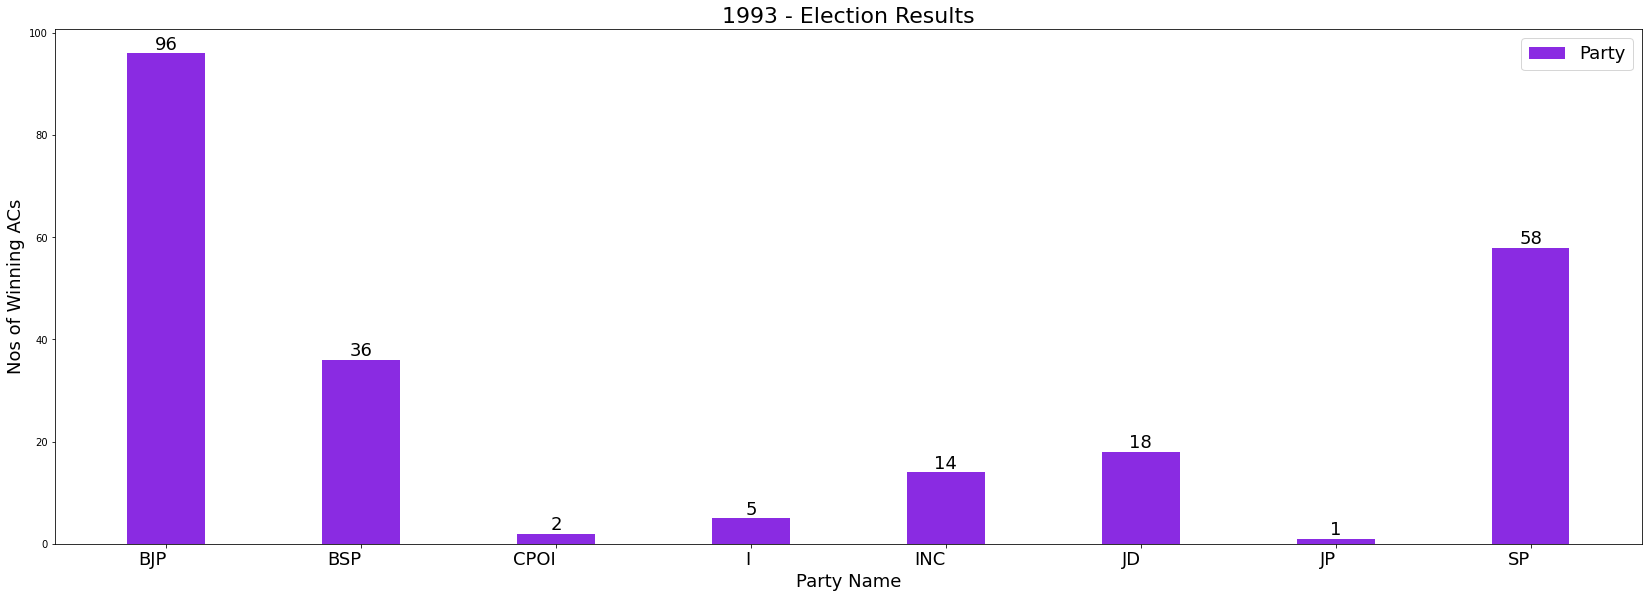

In [389]:
ds_1993 = df_c_year[df_c_year['Year'] == '1993']

width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = ds_1993['Party'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, ds_1993.sort_values(by='Party', ascending=True)['counts'], width, color='blueviolet',
                   label='Party')

ax.set_xlabel('Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("1993 - Election Results", fontsize=22)

plt.show()

In [390]:
ds_1993

Year Party  counts
0  1993   BJP      96
1  1993   BSP      36
2  1993  CPOI       2
3  1993     I       5
4  1993   INC      14
5  1993    JD      18
6  1993    JP       1
7  1993    SP      58

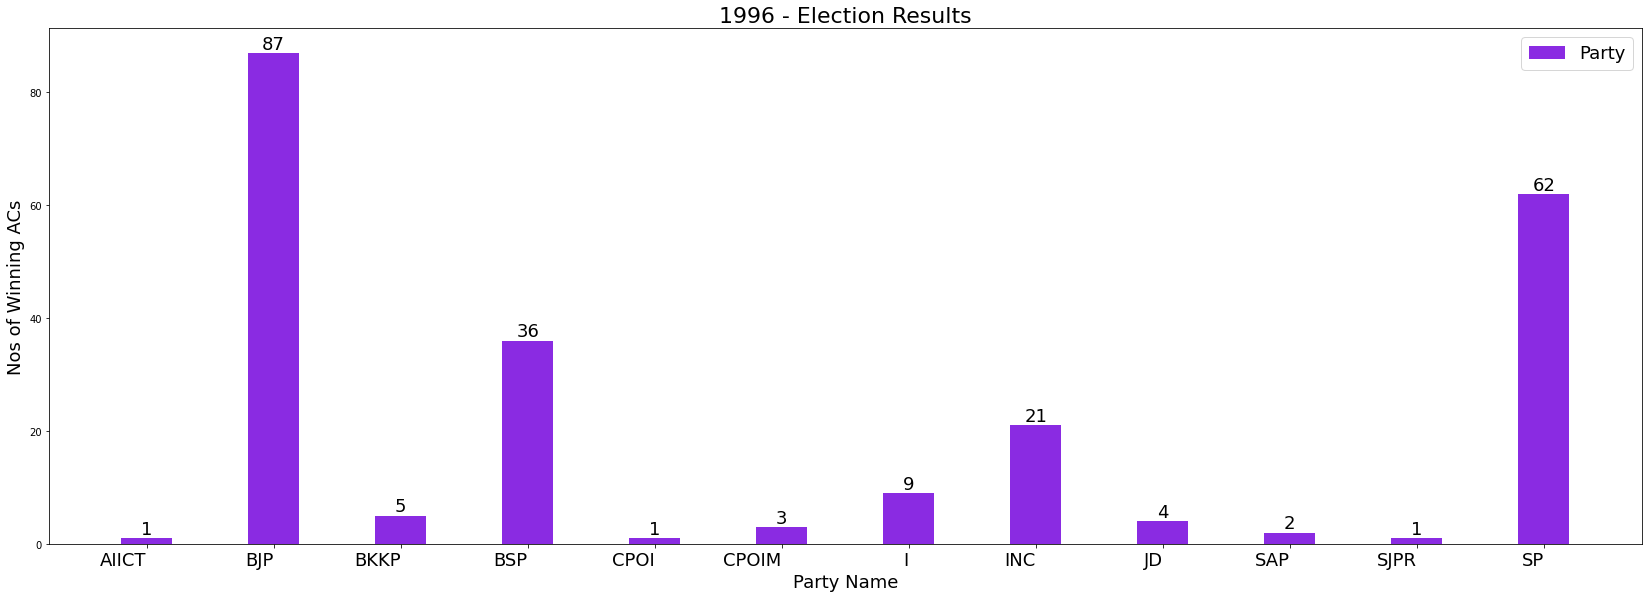

In [391]:
ds_1996 = df_c_year[df_c_year['Year'] == '1996']

width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = ds_1996['Party'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, ds_1996.sort_values(by='Party', ascending=True)['counts'], width, color='blueviolet',
                   label='Party')

ax.set_xlabel('Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("1996 - Election Results", fontsize=22)

plt.show()

In [392]:
ds_1996

Year  Party  counts
8   1996  AIICT       1
9   1996    BJP      87
10  1996   BKKP       5
11  1996    BSP      36
12  1996   CPOI       1
13  1996  CPOIM       3
14  1996      I       9
15  1996    INC      21
16  1996     JD       4
17  1996    SAP       2
18  1996   SJPR       1
19  1996     SP      62

In [393]:
ds_2002 = df_c_year[df_c_year['Year'] == '2002']

width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = ds_2002['Party'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, ds_2002.sort_values(by='Party', ascending=True)['counts'], width, color='blueviolet',
                   label='Party')

ax.set_xlabel('Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("2002 - Election Results", fontsize=22)

plt.show()

In [394]:
ds_2002

Year  Party  counts
20  2002  ABLTC       1
21  2002     AD       1
22  2002    BJP      55
23  2002    BSP      46
24  2002  CPOIM       1
25  2002      I      10
26  2002    INC      20
27  2002    JDU       1
28  2002     JP       1
29  2002    NLP       1
30  2002    RKP       2
31  2002    RLD       8
32  2002    RPD       1
33  2002   SJPR       1
34  2002     SP      81

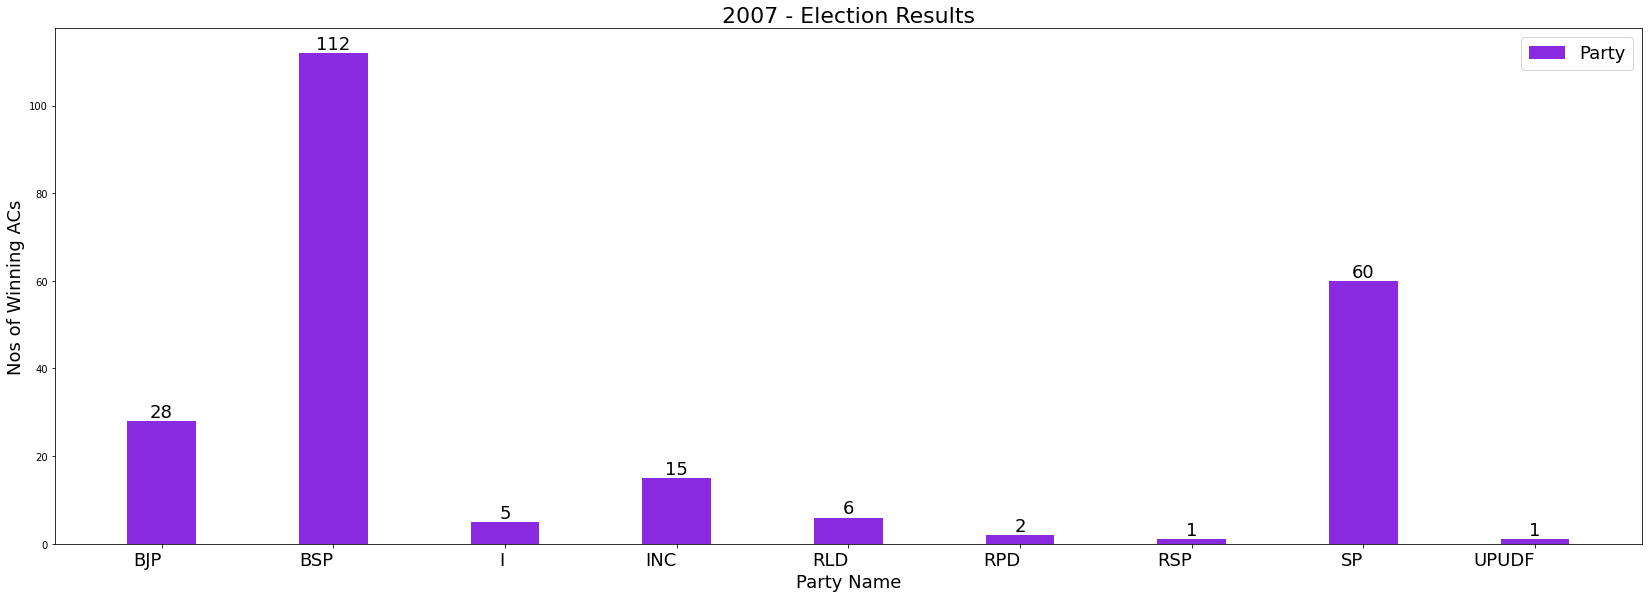

In [395]:
ds_2007 = df_c_year[df_c_year['Year'] == '2007']

width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = ds_2007['Party'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, ds_2007.sort_values(by='Party', ascending=True)['counts'], width, color='blueviolet',
                   label='Party')

ax.set_xlabel('Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("2007 - Election Results", fontsize=22)

plt.show()

In [396]:
ds_2007

Year  Party  counts
35  2007    BJP      28
36  2007    BSP     112
37  2007      I       5
38  2007    INC      15
39  2007    RLD       6
40  2007    RPD       2
41  2007    RSP       1
42  2007     SP      60
43  2007  UPUDF       1

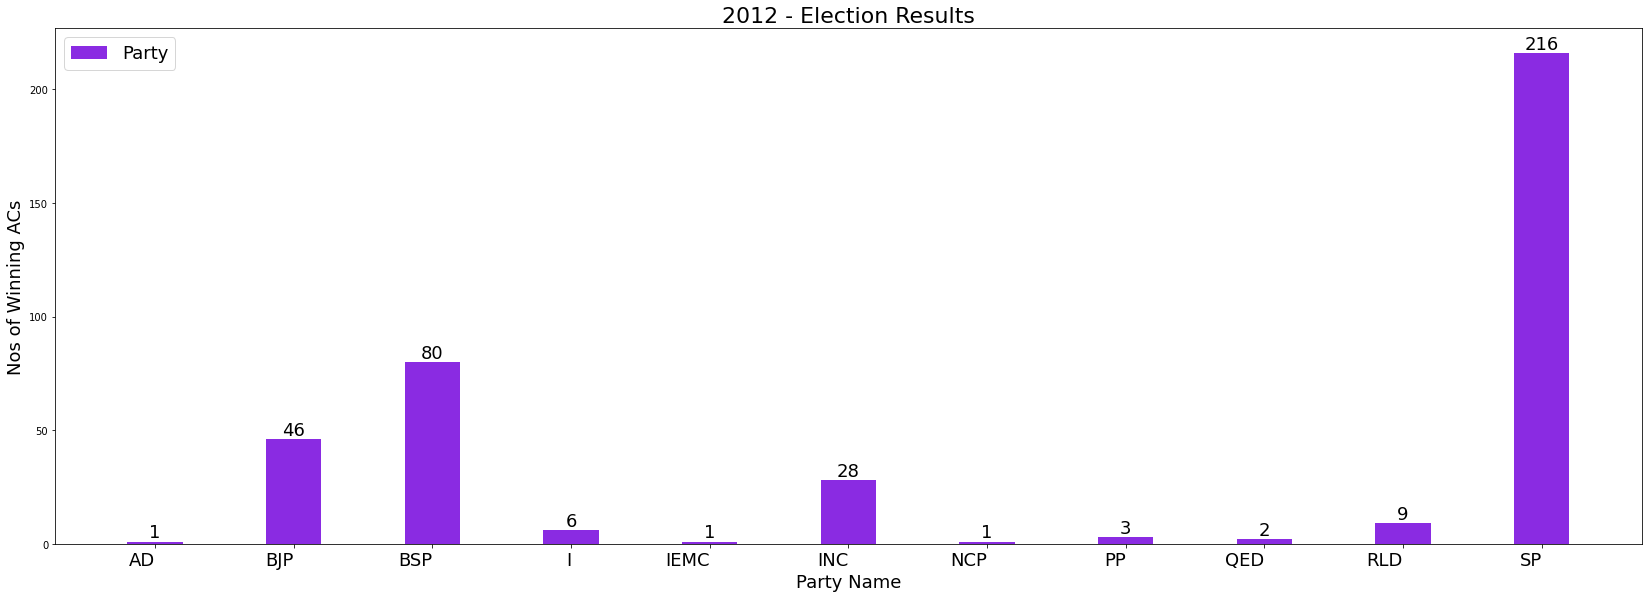

In [397]:
ds_2012 = df_c_year[df_c_year['Year'] == '2012']

width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = ds_2012['Party'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, ds_2012.sort_values(by='Party', ascending=True)['counts'], width, color='blueviolet',
                   label='Party')

ax.set_xlabel('Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("2012 - Election Results", fontsize=22)

plt.show()

In [398]:
ds_2012

Year Party  counts
44  2012    AD       1
45  2012   BJP      46
46  2012   BSP      80
47  2012     I       6
48  2012  IEMC       1
49  2012   INC      28
50  2012   NCP       1
51  2012    PP       3
52  2012   QED       2
53  2012   RLD       9
54  2012    SP     216

In [399]:
ds_2017 = df_c_year[df_c_year['Year'] == '2017']

width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = ds_2017['Party'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, ds_2017.sort_values(by='Party', ascending=True)['counts'], width, color='blueviolet',
                   label='Party')

ax.set_xlabel('Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("2017 - Election Results", fontsize=22)

plt.show()

In [400]:
df_c_year

Year   Party  counts
0   1993     BJP      96
1   1993     BSP      36
2   1993    CPOI       2
3   1993       I       5
4   1993     INC      14
..   ...     ...     ...
59  2017     INC       7
60  2017  NISHAD       1
61  2017     RLD       1
62  2017    SBSP       4
63  2017      SP      46

[64 rows x 3 columns]

In [401]:

df_c_year['dense_rank'] = (df_c_year.groupby('Year')['counts']
                      .rank(method='dense', ascending=False)
                      .astype(int)
                   )

df_c_year_res = df_c_year[df_c_year['dense_rank'] == 1][['Year', 'Party', 'counts']]
df_c_year_res['Party_Year'] = df_c_year_res['Year'].astype(str) + str(' - ') + df_c_year_res['Party']
df_c_year_res

Year Party  counts  Party_Year
0   1993   BJP      96  1993 - BJP
9   1996   BJP      87  1996 - BJP
34  2002    SP      81   2002 - SP
36  2007   BSP     112  2007 - BSP
54  2012    SP     216   2012 - SP
56  2017   BJP     308  2017 - BJP

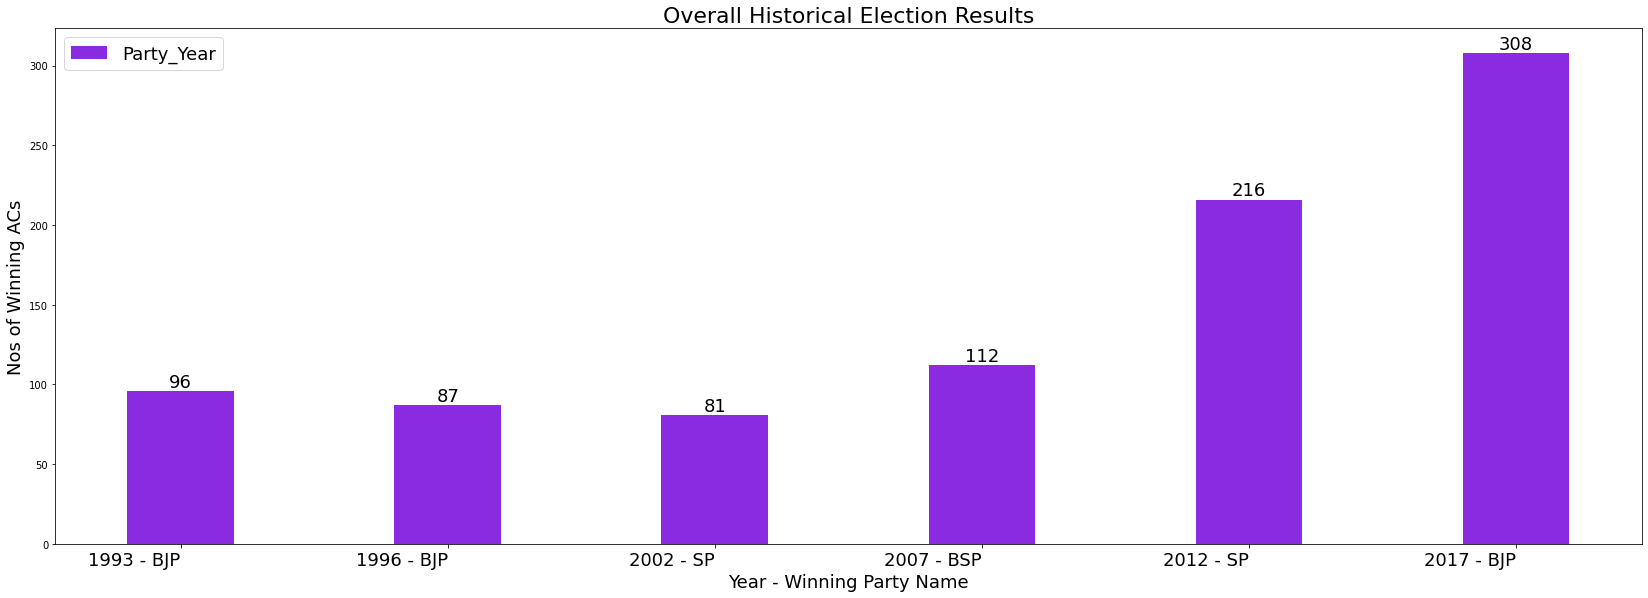

In [402]:
width = .4  # width of a bar

fig, ax = plt.subplots(1, 1, figsize=(23, 8))

labels = df_c_year_res['Party_Year'].sort_values(ascending=True).values
x = np.arange(len(labels))  # the label locations
    
rects1 = ax.bar(x, df_c_year_res.sort_values(by='Party_Year', ascending=True)['counts'], width, color='blueviolet',
                   label='Party_Year')

ax.set_xlabel('Year - Winning Party Name', fontsize=18)
ax.set_ylabel('Nos of Winning ACs', fontsize=18)
ax.legend(fontsize=18)

ax.bar_label(rects1, fontsize=18)

fig.tight_layout()

ax.set_xticks(x)

ax.set_xticklabels(labels, rotation=0, horizontalalignment='right', fontsize=18)
plt.title("Overall Historical Election Results", fontsize=22)

plt.show()

In [403]:
df_r_party.rename(columns={'Party':'Winning_Party', 'Party_label':'Party_Category', 'count':'Nos of Wins'
                          , 'Year_2_Party':'Renominated_Loss'}, inplace=True)

with pd.ExcelWriter('UP_Election_Analysis_Summary.xlsx') as writer:
    df_party.to_excel(writer, sheet_name='Party_Info')
    df_r_party.to_excel(writer, sheet_name='AC_Analysis')